## Nearest Station Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [27]:
# Import NOAA's daily temperature data for nearest station to WTP 
nearest_clim = pd.read_csv("../data/NOAA_orignal_data/Nearest_Stn_Clim_Data.csv")
display(nearest_clim.head())

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,USW00014739,"BOSTON, MA US",1/1/2020,0.00,39.0,43,36
1,USW00014739,"BOSTON, MA US",1/2/2020,0.00,40.0,49,34
2,USW00014739,"BOSTON, MA US",1/3/2020,0.00,47.0,52,44
3,USW00014739,"BOSTON, MA US",1/4/2020,0.13,47.0,48,40
4,USW00014739,"BOSTON, MA US",1/5/2020,0.11,39.0,41,32


In [28]:
nearest_clim.loc[nearest_clim.TAVG.isna()]

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
210,USW00014739,"BOSTON, MA US",7/29/2020,0.00,NaN,87,73
211,USW00014739,"BOSTON, MA US",7/30/2020,0.00,NaN,87,70
212,USW00014739,"BOSTON, MA US",7/31/2020,0.00,NaN,77,68
213,USW00014739,"BOSTON, MA US",8/1/2020,0.00,NaN,81,69
214,USW00014739,"BOSTON, MA US",8/2/2020,0.07,NaN,87,70
215,USW00014739,"BOSTON, MA US",8/3/2020,0.00,NaN,92,73
216,USW00014739,"BOSTON, MA US",8/4/2020,0.17,NaN,79,70


In [29]:
nearest_clim.TAVG.where(~nearest_clim['TAVG'].isna(), nearest_clim[['TMAX', 'TMIN']].mean(axis=1), inplace=True)

In [30]:
nearest_clim.loc[nearest_clim.TAVG.isna()]

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN


In [31]:
nearest_clim.iloc[200:220,:]

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
200,USW00014739,"BOSTON, MA US",7/19/2020,0.00,82.0,95,70
201,USW00014739,"BOSTON, MA US",7/20/2020,0.00,82.0,93,75
202,USW00014739,"BOSTON, MA US",7/21/2020,0.00,83.0,90,74
203,USW00014739,"BOSTON, MA US",7/22/2020,0.11,75.0,79,68
204,USW00014739,"BOSTON, MA US",7/23/2020,0.57,76.0,89,68
205,USW00014739,"BOSTON, MA US",7/24/2020,0.00,74.0,79,70
206,USW00014739,"BOSTON, MA US",7/25/2020,0.00,76.0,84,68
207,USW00014739,"BOSTON, MA US",7/26/2020,0.00,81.0,91,73
208,USW00014739,"BOSTON, MA US",7/27/2020,0.00,86.0,95,75
209,USW00014739,"BOSTON, MA US",7/28/2020,0.00,83.0,95,78


In [32]:
nearest_clim.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
TAVG       float64
TMAX         int64
TMIN         int64
dtype: object

**Convert dates in date time format**

In [33]:
nearest_clim['DATE_conv'] = pd.to_datetime(nearest_clim['DATE'], infer_datetime_format=True)

In [34]:
nearest_clim

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN,DATE_conv
0,USW00014739,"BOSTON, MA US",1/1/2020,0.00,39.0,43,36,2020-01-01
1,USW00014739,"BOSTON, MA US",1/2/2020,0.00,40.0,49,34,2020-01-02
2,USW00014739,"BOSTON, MA US",1/3/2020,0.00,47.0,52,44,2020-01-03
3,USW00014739,"BOSTON, MA US",1/4/2020,0.13,47.0,48,40,2020-01-04
4,USW00014739,"BOSTON, MA US",1/5/2020,0.11,39.0,41,32,2020-01-05
...,...,...,...,...,...,...,...,...
239,USW00014739,"BOSTON, MA US",8/27/2020,0.18,64.0,66,60,2020-08-27
240,USW00014739,"BOSTON, MA US",8/28/2020,0.00,68.0,82,61,2020-08-28
241,USW00014739,"BOSTON, MA US",8/29/2020,0.07,70.0,76,65,2020-08-29
242,USW00014739,"BOSTON, MA US",8/30/2020,0.00,72.0,77,63,2020-08-30


In [38]:
#save csv file
#nearest_clim.to_csv("../data/final_nearest_stn_clim_noaa.csv",index=False, header =True, sep=',')

Text(0, 0.5, 'Precipitation in inches')

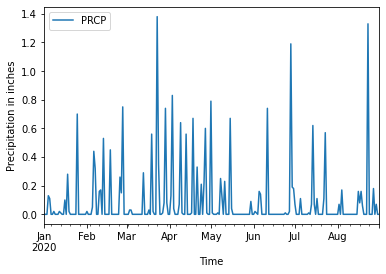

In [36]:
# ploting precipitation
nearest_clim.plot(x='DATE_conv', y='PRCP')
plt.xlabel("Time")
plt.ylabel("Precipitation in inches")

Text(0, 0.5, 'Temperature in F')

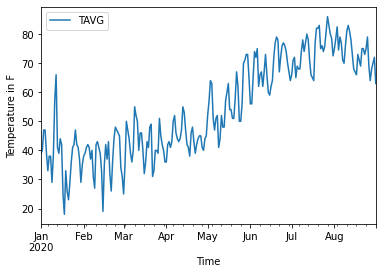

In [37]:
# ploting average temperature
nearest_clim.plot(x='DATE_conv', y='TAVG')
plt.xlabel("Time")
plt.ylabel("Temperature in F")